# Anomaly Detection Examples with R carData Davis dataset with Kernel Density Estimatation

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P82-83 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
data = df[['weight','height']]

### Seabornによるカーネル密度分布のプロット

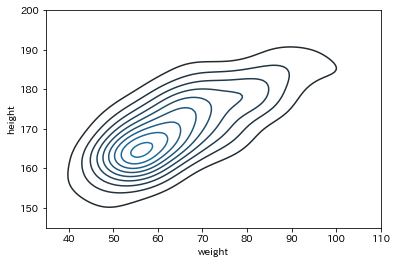

In [4]:
import seaborn as sns

_ = sns.kdeplot(data['weight'], data['height'], clip=[(35, 110),(145, 200)])

### statsmodels の KDEMultivariate モデルによる異常検知

In [5]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [6]:
kde_multi = KDEMultivariate(data, bw='normal_reference', var_type='cc')

In [7]:
bw = kde_multi.bw

In [8]:
x = np.arange(35, 110, 1)
y = np.arange(145, 200, 1)

nbins=100

xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
xy = np.vstack([xi.flatten(), yi.flatten()])
print(xy.shape)

(2, 10000)


In [9]:
zi = kde_multi.pdf(xy)

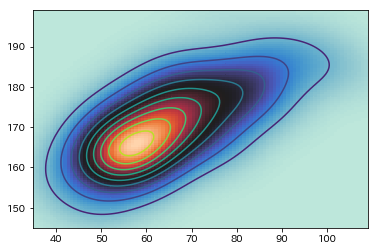

In [10]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='icefire')
plt.contour(xi, yi, zi.reshape(xi.shape), levels=10)
plt.show()

In [11]:
from statsmodels.nonparametric._kernel_base import LeaveOneOut, gpke

In [12]:
npdata = data.to_numpy()

In [13]:
LOO = LeaveOneOut(data)

In [14]:
result = []
for i, X_not_i in enumerate(LOO):
    f_i = gpke(bw, data=-X_not_i, data_predict=-npdata[i,:], var_type='cc')
    result.append(-np.log(f_i))

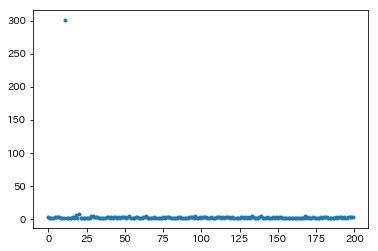

In [15]:
plt.plot(result,'.')
plt.show()

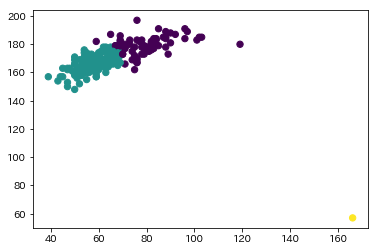

In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(data)
labels = gmm.predict(data)
plt.scatter(data['weight'], data['height'], c=labels, s=40, cmap='viridis');